![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>

# 前言

在 Python 中的繪圖套件 <font color="#00dd00">**Matplotlib**</font>/<font color="#00dd00">**Seaborn**</font> 提供多種繪圖的函數，幫助我們進行資料視覺化( Data Visulization )，探索資料的分佈情況與呈現資料分析的結果。本篇文章以 Python 3.7.10 、 Numpy 1.19.5 、 Pandas 1.1.5 、 Matplotlib 3.2.2 、 Seaborn 0.11.1 進行教學。

首先，在使用 jupyter notebook 時，可在指令中加上 %matplotlib inline，這個指令可讓圖形不會在新視窗呈現(內嵌畫圖)，有了 %matplotlib inline 就可以省掉 plt.show()。在使用 colab 時，有沒有加上述 2 個指令好像沒有甚麼差別。

## 匯入基本套件

In [ ]:
import numpy as np
import pandas as pd 

print( 'NumPy version: ', np.__version__ )
print( 'Pandas version: ', pd.__version__ )

NumPy version:  1.19.5
Pandas version:  1.1.5


## 簡介資料集

### 資料集01 - 鳶尾花

鳶尾花資料集 (Iris data set) 是非常著名的生物資訊資料集之一，取自美國加州大學歐文分校的機器學習資料庫 http://archive.ics.uci.edu/ml/datasets/Iris ，資料的筆數為 150 筆，鳶尾的 3 個類別，分別是山鳶尾(Setosa)、變色鳶尾(Virginica)和維吉尼亞鳶尾(Versicolour)，4 個特徵被用作樣本的定量分析，共有 5 個欄位：
  1. 花萼長度 (Sepal Length)：計算單位是公分
  2. 花萼寬度 (Sepal Width)：計算單位是公分
  3. 花瓣長度 (Petal Length) ：計算單位是公分
  4. 花瓣寬度 (Petal Width)：計算單位是公分
  5. 類別 (Class)：可分為 Setosa、Versicolor、Virginica 

透過花瓣以及花萼的長與寬來預測是屬於哪一種類的鳶尾花(Setosa, Virginica, Versicolour)

Iris data set 是最入門的機器學習演算法資料，透過花瓣及花萼的長與寬來預測屬於哪種類的鳶尾花，且它是 scikit-learn 內建的資料集之一，scikit-learn 內建的資料集用起來非常簡單，只要一行指令就可以載入資料，scikit-learn 提供的 dataset 可參考 [sklearn-datasets](https://scikit-learn.org/stable/datasets/index.html) 的 Toy datasets 及 Real world datasets。資料匯入方式：

In [ ]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()    # 回傳格式為dictionary，將一個dict型別資料存入iris

由於二維陣列對於初學者來說較不好直接使用，因此先用 pandas 將資料轉換成 dataframe 的形態：

In [ ]:
iris_feature = pd.DataFrame( iris['data'], columns=iris['feature_names'] )
iris_feature.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_class = pd.DataFrame( iris['target'], columns=['target_names'] )
iris_class.head()

,target_names
0,0
1,0
2,0
3,0
4,0


使用 pandas 的 concat 函數將資料的 feature 及 target 整合，axis是指合併的方向，由於採用左右合併因此參數設為 1 即可，若是垂直合併則設為 0：

In [ ]:
iris_data = pd.concat( [iris_feature, iris_class], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# <font color="#00dd00">**Matplot**</font> 是什麼？

使用 Matplotlib (簡稱Matplot) 有兩種主要方式：
* 直接和 Matplot 的全域 pyplot 模組互動操作
* 以物件導向形式的操作方式

若是只有一張圖的話使用全域 pyplot 很方便，若是有多張圖的話用物件導向操作。一般來說 Matplot 預設值並不理想，但它的優點在於很容易在上面外包一層提供更好的預設值或是自己修改預設值。

* 優點：
 * 相較於其他視覺化套件，歷史最悠久
 * 畫圖功能最齊全
* 缺點：
 * 圖表不好看 (舊版的 matplot 很醜，但新版的 matplot 算好看，尤其在 style 功能出來後，可自行切換圖表的風格)
 * 畫圖指令複雜
* 完整指令：
```
matplotlib.pyplot.plot(args, scalex=True, scaley=True, data=None, kwargs)
```
 * args：x、y的特徵
 * kwargs：指定線標籤、線寬、標記面顏色等屬性設定

## 匯入套件

In [ ]:
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 

print( 'Matplotlib 版本: ', matplotlib.__version__ )

Matplotlib 版本:  3.2.2


## 背景設定

以往用 Matplot 畫圖需要將 Pandas 資料丟進 Matplot 畫圖，不過因為現在 Pandas 有整合 Matplot，所以可在 Pandas 的 DataFrame 下直接使用畫圖功能，使用起來更方便。以 Iris data set 為例：

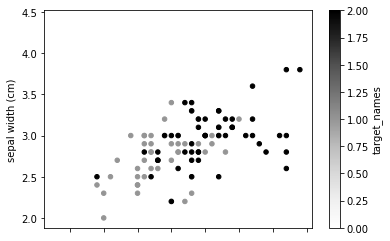

In [ ]:
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names' )

圖示的背景未設定顏色，經 `還原原始設定` 後，圖示的背景全為白色：

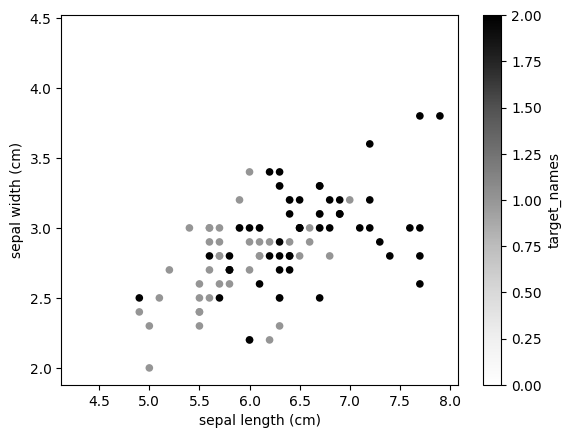

In [ ]:
plt.style.use( 'default' )  # 還原原始設定
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names' )

使用 iris_data (Dataframe的格式) 直接 .plot 之後就可接 Matplot 的函式，x、y 直接指定欄位名稱，非常好用！c 是 color 的意思，但由於 target 的範圍是 0、1、2，所以 Matplot 會當成是灰階的範圍。

如果要變成紅綠藍的話要怎麼做呢？先創造出一個 0、1、2 對應 r、g、b 的 dictionary，接著創造出一個 r、g、b 的 color 欄位，然後將 c 的參數指定到 color 欄位即可：

In [ ]:
color = {
          0:'r',
          1:'g',
          2:'b'
}
iris_data['color'] = iris_data['target_names'].map( color )
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,color
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r
2,4.7,3.2,1.3,0.2,0,r
3,4.6,3.1,1.5,0.2,0,r
4,5.0,3.6,1.4,0.2,0,r


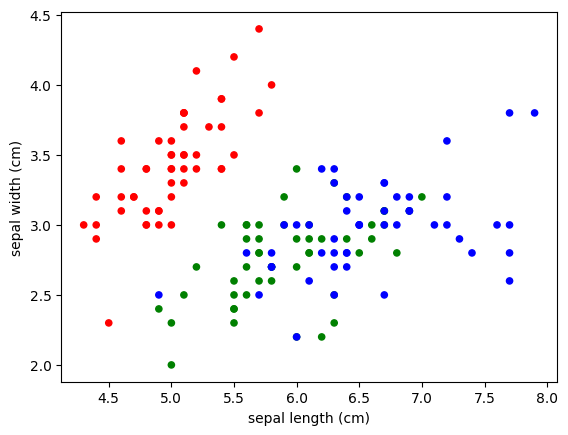

In [ ]:
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)', c='color' )

但從圖上沒辦法一目了然看出紅藍綠這三種顏色對應到 Iris 的三種品種 setosa、versicolor、virginica，因此還要再加上 label。在 Matplot 要加上 label 比較麻煩：

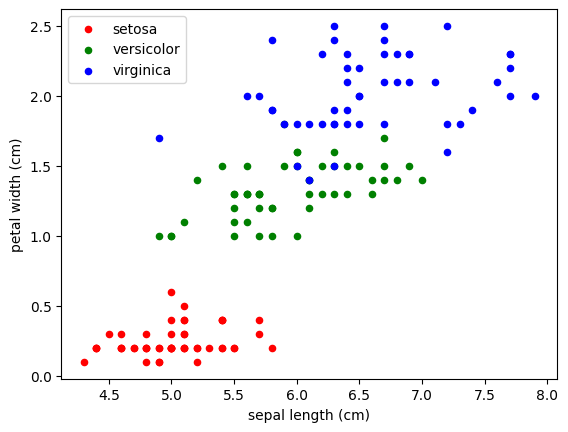

In [ ]:
ax = iris_data[iris_data['target_names']==0].plot.scatter( x='sepal length (cm)', y='petal width (cm)', color='r', label='setosa' )
ax = iris_data[iris_data['target_names']==1].plot.scatter( x='sepal length (cm)', y='petal width (cm)', color='g', label='versicolor', ax=ax )
iris_data[iris_data['target_names']==2].plot.scatter( x='sepal length (cm)', y='petal width (cm)', color='b', label='virginica', ax=ax )

###### plt.style.use：設定作圖的風格

`plt.style.use( )` 可設定作圖的風格，風格的樣式請參考 [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)：

([<matplotlib.patches.Wedge at 0x7f8e173b2990>,
 [Text(0.8251221670583667, 0.7274430626715089, 'Apple'),
  Text(-0.46835726917914433, 0.9953097349102212, 'Orange'),
  Text(-1.0328904003772803, -0.6108497530559064, 'Bananas'),
  Text(0.5599456069679137, -0.9468162003458405, 'Mango'),
  Text(1.056323079529793, -0.30689012961106205, 'Watermelo')],
 [Text(0.4500666365772909, 0.3967871250935503, '23.0%'),
  Text(-0.25546760137044233, 0.5428962190419387, '18.0%'),
  Text(-0.6025194002200801, -0.3563290226159454, '35.0%'),
  Text(0.3054248765279529, -0.5164452001886403, '15.0%'),
  Text(0.5761762251980689, -0.16739461615148837, '9.0%')])

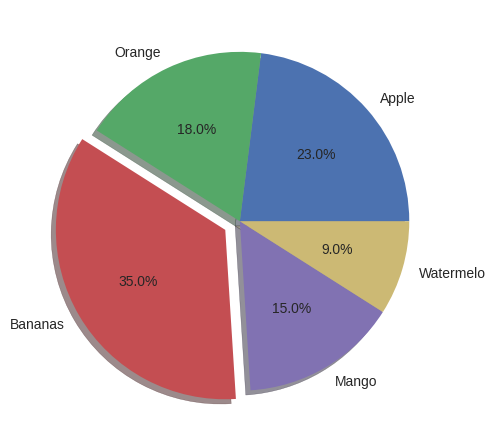

In [ ]:
# seaborn Style
plt.style.use( 'seaborn' )

# Data 
Products = ['Apple','Orange','Bananas','Mango','Watermelo']
Amount = [23,18,35,15,9] 

# Pie Chart
plt.pie( x=Amount, labels=Products, autopct='%1.1f%%', explode=(0,0,0.1,0,0), shadow=True )

([<matplotlib.patches.Wedge at 0x7f8e1674a210>,
 [Text(0.8251221670583667, 0.7274430626715089, 'Apple'),
  Text(-0.46835726917914433, 0.9953097349102212, 'Orange'),
  Text(-1.0328904003772803, -0.6108497530559064, 'Bananas'),
  Text(0.5599456069679137, -0.9468162003458405, 'Mango'),
  Text(1.056323079529793, -0.30689012961106205, 'Watermelo')],
 [Text(0.4500666365772909, 0.3967871250935503, '23.0%'),
  Text(-0.25546760137044233, 0.5428962190419387, '18.0%'),
  Text(-0.6025194002200801, -0.3563290226159454, '35.0%'),
  Text(0.3054248765279529, -0.5164452001886403, '15.0%'),
  Text(0.5761762251980689, -0.16739461615148837, '9.0%')])

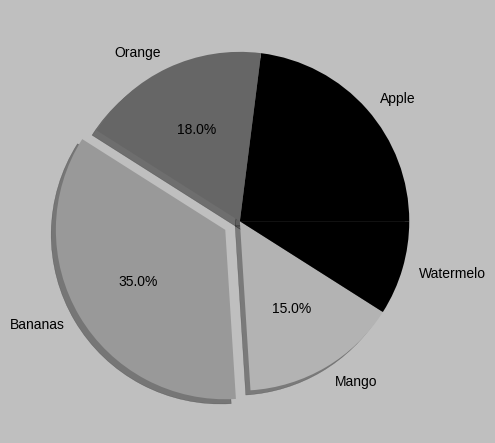

In [ ]:
# grayscale Style
plt.style.use( 'grayscale' )

# Data 
Products = ['Apple','Orange','Bananas','Mango','Watermelo']
Amount = [23,18,35,15,9] 

# Pie Chart
plt.pie( x=Amount, labels=Products, autopct='%1.1f%%', explode=(0,0,0.1,0,0), shadow=True )

# <font color="#00dd00">**Seaborn**</font> 是什麼？

Seaborn 是在 Matplot 的基礎上實作更高階的視覺化 API，，進行更高級的改善，讓作圖更加方便且快速，更方便做出具有分析價值且美觀的圖形。同時可高度兼容 numpy 與 pandas 數據結構。可更高效的掌握數據與圖表。

* 優點：
 * 畫圖指令非常簡單
 * 圖案好看
* 缺點：
 * 少數進階的圖案很難畫或沒辦法畫 (可用 matplot 互補)

## 匯入套件

In [ ]:
import seaborn as sns

print( 'Seaborn 版本: ', sns.__version__ )

Seaborn 版本:  0.11.1


## 背景設定

Matplot 基本套件無法從圖上一目了然看出紅藍綠這三種顏色對應到 Iris 的三種品種 setosa、versicolor、virginic，Seaborn 只要用一行就可根據不同類別加上不同顏色以及標籤，以 Iris data set 為例：

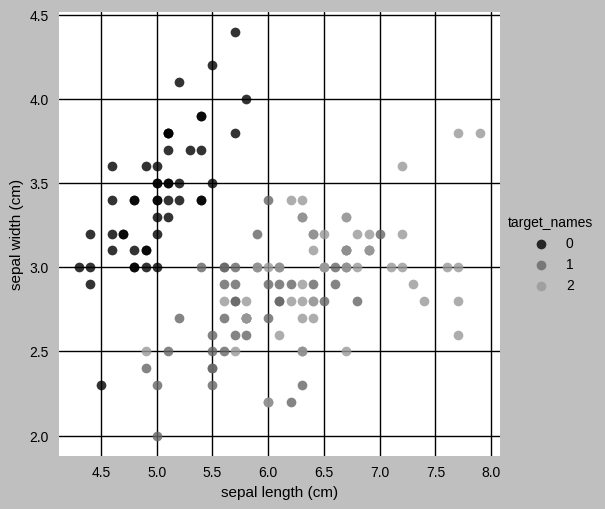

In [ ]:
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target_names' )

經 `還原原始設定` ：

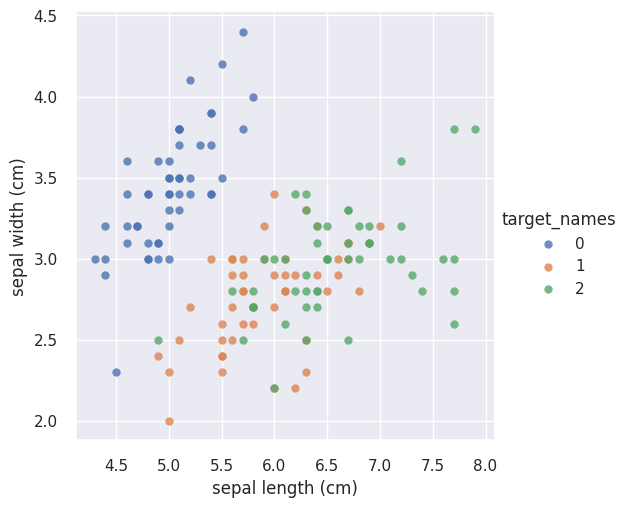

In [ ]:
sns.set()      #還原原始設定
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target_names' )

更講究一點的話，可再把數字轉成名字(同Matplot作法)：

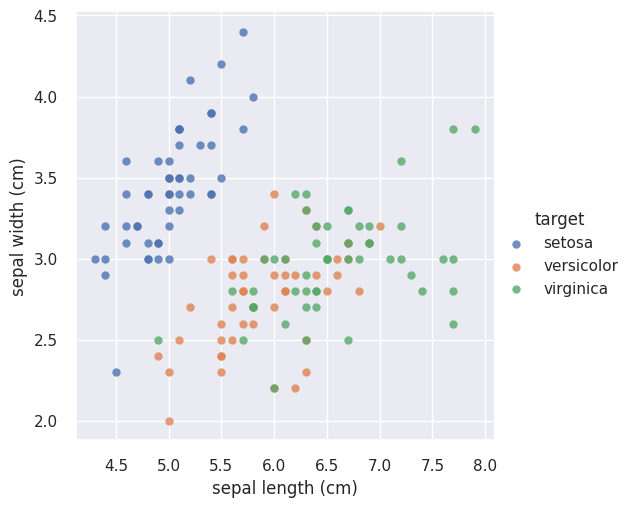

In [ ]:
target = {
             0:'setosa',
             1:'versicolor',
             2:'virginica'
}
iris_data['target'] = iris_data['target_names'].map(target)
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target' )

### set_style：設定背景顏色
* 有五種風格：
  * darkgrid：黑色網格
  * dark：黑色背景
  * whitegrid：白色網格
  * white：白色背景
  * ticks：四周都有刻度線的白背景

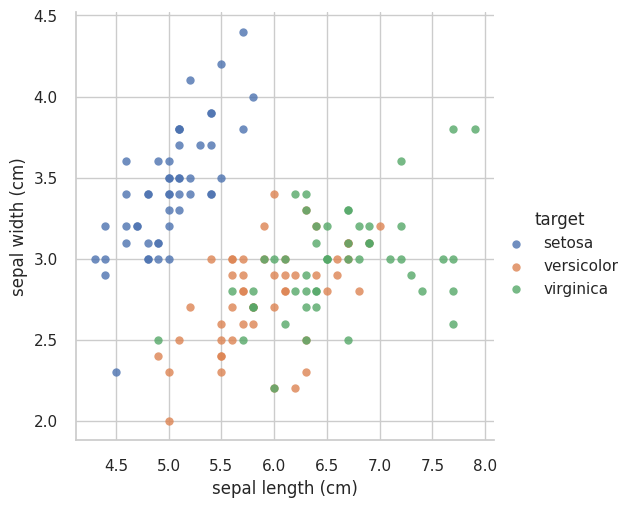

In [ ]:
sns.set_style( 'whitegrid' )
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target' )

### set_context：設定圖形大小
* 可看到跟原本圖形的座標顯示大小不一樣，有四種風格：
  * paper (font=0.8)
  * notebook (default，font=1)
  * talk (font=1.3)
  * poster (font=1.6)

![picture](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content_imgs/set_context.JPG)

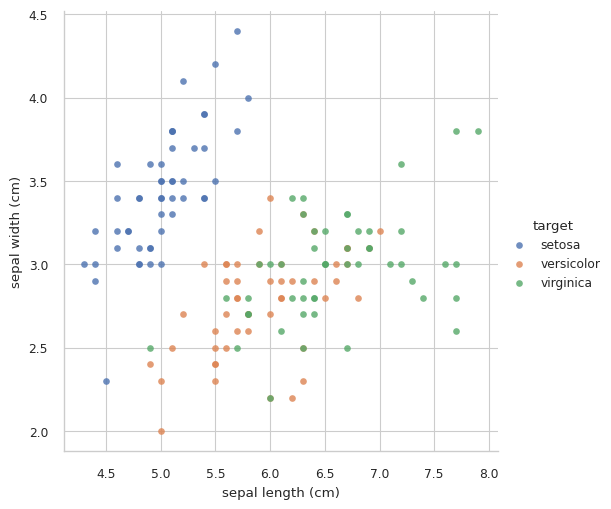

In [ ]:
sns.set_context( 'paper' )
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target' )

### set_palette：可設定圖示的顏色
* 六種色表可設定，色表是從藍色開始，順時針取用：
  * deep
  * muted
  * pastel
  * bright
  * dark
  * colorblind

![picture](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content_imgs/set_palette.JPG)

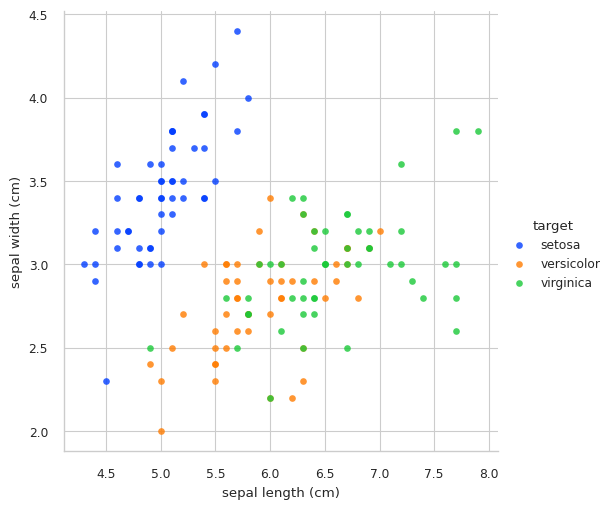

In [ ]:
sns.set_palette(sns.color_palette( 'bright' ))
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target' )

輸入 RBG

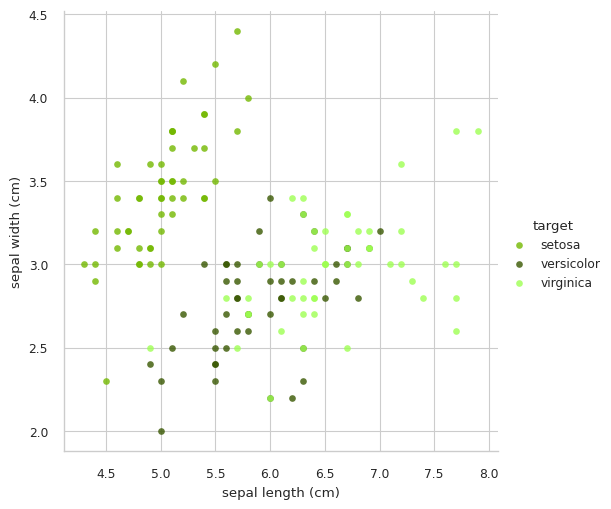

In [ ]:
sns.set_palette(sns.color_palette( [(0.45,0.72,0), (0.22,0.34,0), (0.62,1,0.32)] ))  # 輸入rgb
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=iris_data, fit_reg=False, hue='target' )

# 其他設定

接下來的設定及說明，Matplot 與 Seaborn 套件會互相搭配使用：

## 設定 Colab 繪圖環境

為在 Colab 中繪圖能顯示中文字體，我們須先變更 Matplotlib 套件的字形設定。

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont( 'taipei_sans_tc_beta.ttf' )
mpl.rc( 'font', family='Taipei Sans TC Beta' )

Text(0.5, 0, '時間')

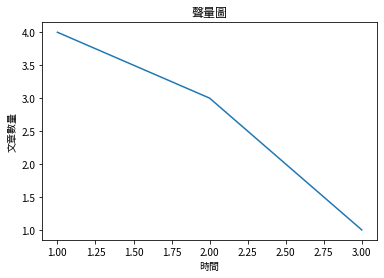

In [ ]:
import matplotlib as mat
from matplotlib.font_manager import FontProperties # 步驟一

plt.plot((1,2,3),(4,3,1)) 
plt.title( '聲量圖' ) 
plt.ylabel( '文章數量' )
plt.xlabel( '時間' ) 

## 繪製多張圖表

使用 [`matplotlib.pyplot.subplot( nrows, ncols, index )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) 函數可在同一個視窗中繪製多張圖表，參數說明如下： 
* nrows：子圖表的列數
* ncols：子圖表的行數
* index：進行子圖表繪圖的位置

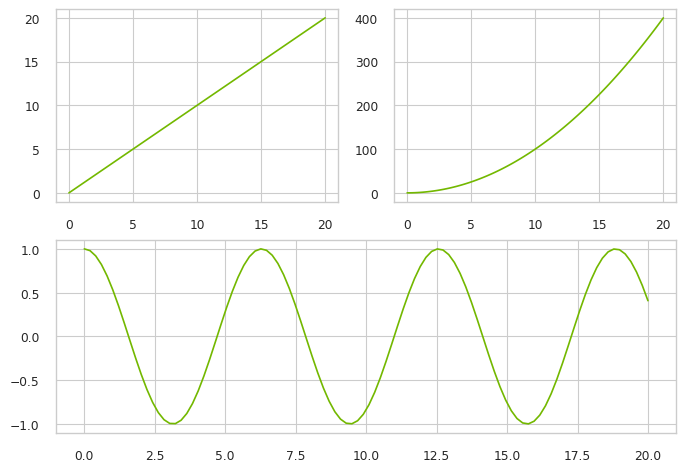

In [ ]:
# Data 
x = np.linspace(0,20,100)

# Plot y=x, y=x^2, and y=sin(x)
plt.subplot(221)
plt.plot( x, x, label='y=x' )

plt.subplot(222)
plt.plot( x, x**2, label='y=x^2' )

plt.subplot(212)
plt.plot( x, np.cos(x), label='y=cos(x)' )

## 圖標題與座標軸的標籤

[`matplotlib.pyplot.title()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) 函數可用來設定圖表上方的標題，另外， [`matplotlib.pyplot.xlabel()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) 與 [`matplotlib.pyplot.ylabel()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html) 可分別用來添增 x 軸與 y 軸的標籤，各函數的功能與其參數說明如下：  
* `plt.title( label, loc='center', pad )` 設定圖標題：
  * label : 標題內容
  * loc : 標題位置( 'center' 置中/ 'left' 靠左/ 'right' 靠右 )
  * pad : 標題與圖之間的距離  
* `plt.xlabel( )` 設定 x 座標軸的標籤
* `plt.ylabel( )` 設定 y 座標軸的標籤

Text(0, 0.5, 'sepal width')

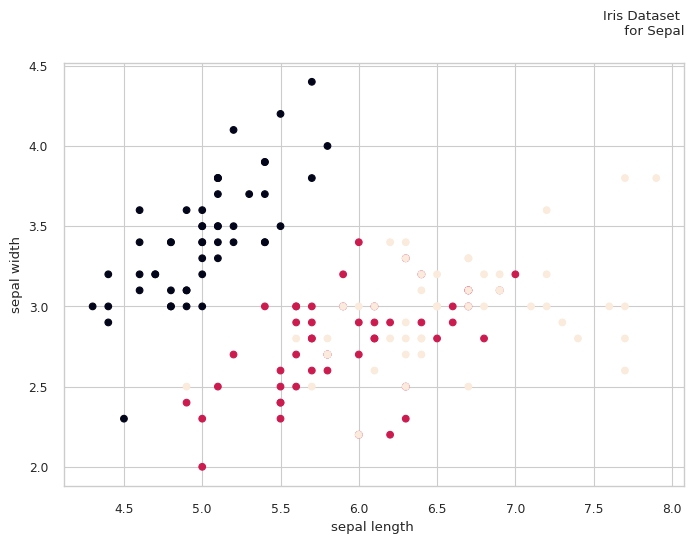

In [ ]:
plt.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names', data=iris_data )
# Title
plt.title( 'Iris Dataset \n for Sepal', loc='right', pad=20 )
# x label
plt.xlabel( 'sepal length ' )
# y label
plt.ylabel( 'sepal width' )

## 圖中的說明圖例

[`matplotlib.pyplot.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) 函數搭配各種繪圖函數中的 `label` 參數設定，則可在圖中顯示圖例的內容：

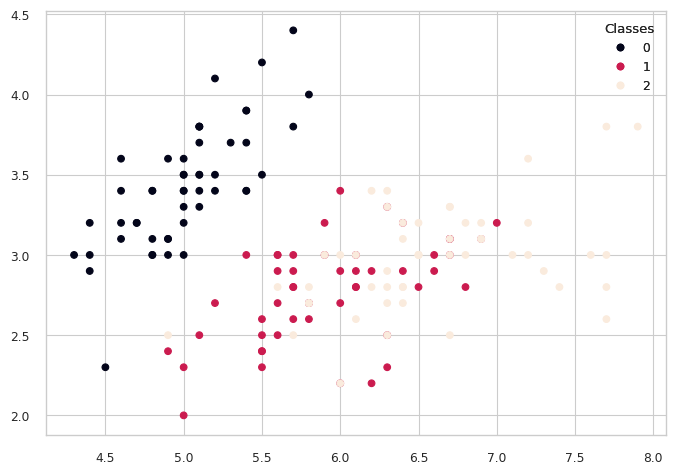

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names', data=iris_data )

# Legend
legend = ax.legend(*scatter.legend_elements(),
                    loc='upper right', title='Classes')
ax.add_artist(legend)

## 圖中的說明文字

使用 [`matplotlib.pyplot.text( x, y, s, fontsize )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) 函數可在圖中加入說明文字，參數說明如下： 
  * x, y：說明文字在圖中的座標位置
  * s：說明文字的內容
  * fontsize：說明文字的大小

Text(7, 2.5, 'Iris Data')

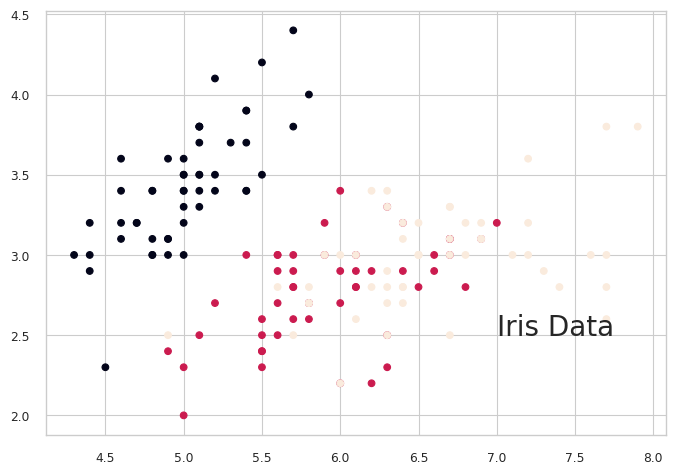

In [ ]:
plt.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names', data=iris_data )

# Text 
plt.text( 7, 2.5, 'Iris Data', fontsize=20 )

## 座標軸的範圍與刻度

* 設定 x-y 座標軸的範圍：`plt.axis( [xmin,xmax,ymin,ymax] )` ，其中， `[xmin,xmax,ymin,ymax]` 分別為 x 軸與 y 軸最小值、最大值
* 僅設定 x 座標軸的範圍：`plt.xlim( [xmin,xmax] )` ，其中， `[xmin,xmax]` 為 x 軸最小值至最大值的範圍
* 僅設定 y 座標軸的範圍：`plt.ylim( [ymin,ymax] )` ，其中， `[ymin,ymax]` 為 y 軸最小值至最大值的範圍
* 設定 x 座標軸的刻度：`plt.xticks( locs, labels )` ，其中， `locs` 用以設定 x 軸的刻度單位、`labels` 可用以設定每個刻度的標籤
* 設定 y 座標軸的刻度：`plt.yticks( locs, labels )` ，其中， `locs` 用以設定 y 軸刻度單位、`labels` 可用以設定每個刻度的標籤
* 顯示直角坐標平面的格線：`plt.grid( axis )` ，其中，若 `axis='x'` 表示僅顯示 x 軸的格線， `axis='y'` 表示僅顯示 y 軸的格線， `axis='both'` 表示同時顯示 x 軸與 y 軸的格線

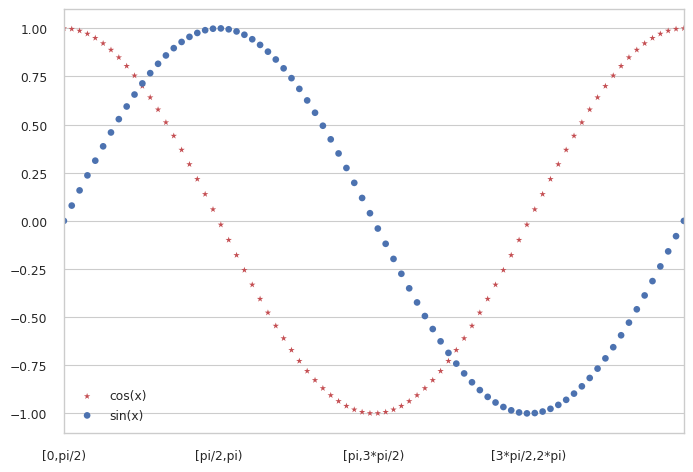

In [ ]:
# Data 
x = np.linspace( 0, 2*np.pi, num=80 )
y1 = np.cos( x )
y2 = np.sin( x )

# Scatter Plot 
plt.scatter( x, y1, c='r', marker='*', edgecolors='none', label='cos(x)' )
plt.scatter( x, y2, c='b', marker='o', edgecolors='none', label='sin(x)' )
plt.legend()

# Range of x-axis
plt.xlim( [0,2*np.pi] )
# Tick locations and labels of the x-axis
plt.xticks( np.arange(0,2*np.pi,np.pi/2), labels=('[0,pi/2)','[pi/2,pi)','[pi,3*pi/2)','[3*pi/2,2*pi)') ) 
# Grid
plt.grid( axis='x' )

## 儲存圖表

[`matplotlib.pyplot.savefig( fname ,format )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) 函數可將繪製完成的圖表，儲存成不同格式的圖檔，常用的圖檔格式有：.png、.jpg、.svg 等，參數說明如下：   
  * fname：圖檔的檔名(包含副檔名)
  * format：圖檔的格式，例如: 'png'、'jpg' 等

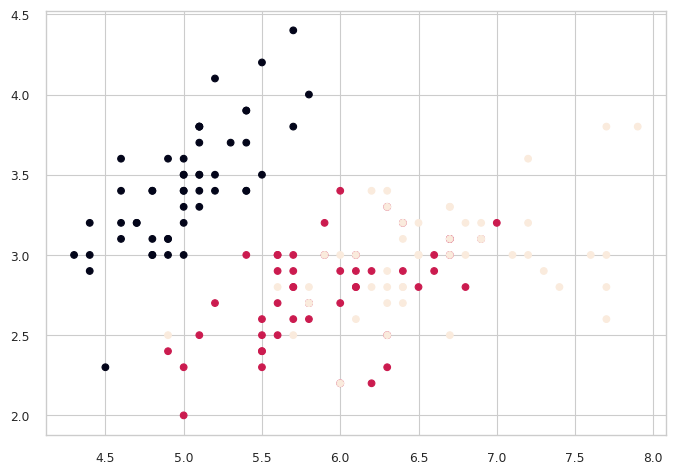

In [ ]:
plt.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names', data=iris_data )

# Save image
plt.savefig( fname='Iris_Scatter.jpg', format='jpg' )

# 結論

本文介紹 2 個套件：Matplot、Seaborn，提供進行資料分析中重要的一環，就是資料視覺化，它能夠將龐雜的數據轉化為資訊，讓現在這些大量的數據資料能夠更好地被梳理，得以表現出資料的規律、趨勢、分布等等現象，然後再據此做更好的討論以及策略研擬。  
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [Scikit Learn](https://scikit-learn.org/stable/user_guide.html)
* [Scatter plots with a legend](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html)